<a href="https://colab.research.google.com/github/sashwat49/supermarket_sales_project/blob/main/np_pop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Population prediction by growth rate

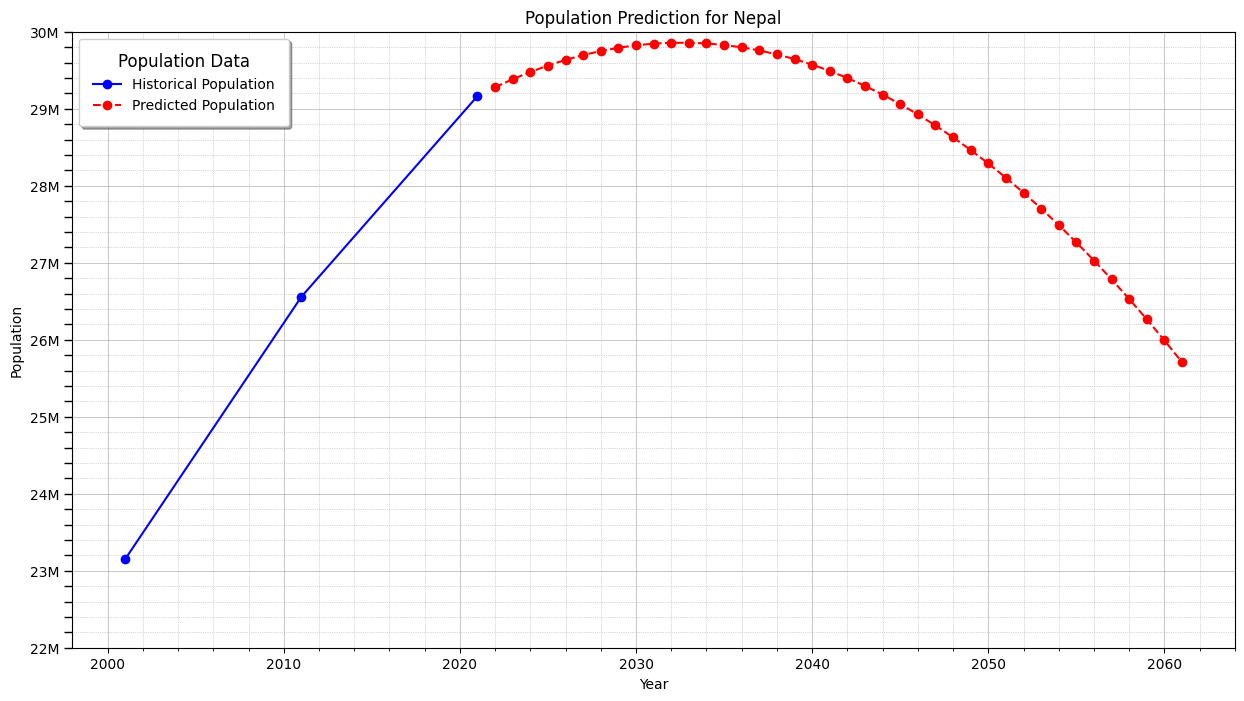

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Historical data
years = np.array([2001, 2011, 2021])
population = np.array([23151423, 26557074, 29164578])
growth_rates = np.array([2.3, 1.35, 0.92]) / 100  # Convert percentages to decimals

# Fit a linear regression model to predict future growth rates
years_future = np.arange(2022, 2062)  # Next 40 years (2022-2061)
years_all = np.append(years, years_future)

model = LinearRegression()
model.fit(years.reshape(-1, 1), growth_rates)
predicted_growth_rates = model.predict(years_future.reshape(-1, 1))

# Logistic growth model function
def logistic_growth(t, P0, K, r):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Predict future population using logistic growth model
P0 = population[-1]  # Initial population in 2021
K = 60000000  # Assumed carrying capacity, adjust as needed

future_population = []
current_population = P0
for r in predicted_growth_rates:
    current_population = logistic_growth(1, current_population, K, r)
    future_population.append(current_population)

# Combine historical and future data
all_population = np.concatenate([population, future_population])

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(years, population, label='Historical Population', color='blue', marker='o')
plt.plot(years_future, future_population, label='Predicted Population', color='red', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Prediction for Nepal')

# Customize the y-axis for better readability
plt.ylim(22000000, 30000000)  # Decrease the y-axis range
plt.yticks(np.arange(22000000, 30000001, 1000000))
plt.minorticks_on()  # Enable minor ticks
plt.tick_params(axis='y', which='both', length=6, width=1)  # Customize tick parameters
plt.grid(True, which='major', linestyle='-', linewidth=0.5)  # Major gridlines
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)  # Minor gridlines

# Customize the legend
plt.legend(
    title="Population Data",
    loc='upper left',  # Location of the legend
    fontsize='medium',  # Font size of the legend text
    title_fontsize='large',  # Font size of the legend title
    shadow=True,  # Adds shadow to the legend
    frameon=True,  # Draws a frame around the legend
    borderpad=1  # Border padding between the legend and its content
)

# Format y-axis labels to be more readable
def format_func(value, tick_number):
    return f'{int(value / 1000000)}M'  # Format the tick labels as millions (M)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.show()
